# Lab Sheet 8 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-8.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [5]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd
import scipy.signal as sig
import soundfile as sf

<br>
<a id='task_1'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1:**
    
<ul>
<li> 
    Load two WAVE files containing speech and noise, e.g. <code>speech_8kHz_murder.wav</code> and <code>noise_8kHz.wav</code> from the Internet address <code>https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/</code> and load them into two variables <code>s</code> and <code>n</code>.
</li> 
  <li>   
    Create a microphone signal $y[k] = s[k]+n[k]$ as shown in the schematic below. Note that the vectors should be cut the same length if needed. Also note that we will do the filtering in the following.

<img src="NRSingleChannelBasic-web.png" align="center"/>
    </li> 
</ul>
</div>

In [2]:
# your code here
# ....

s_file_name = 'speech_8kHz_murder.wav'
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{s_file_name} -o {s_file_name} 
    
n_file_name = 'noise_8kHz.wav'
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{n_file_name} -o {n_file_name}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  328k  100  328k    0     0  1488k      0 --:--:-- --:--:-- --:--:-- 1488k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57808  100 57808    0     0   474k      0 --:--:-- --:--:-- --:--:--  474k


In [8]:
# load speech wave into variable
s, fs = sf.read(s_file_name)

print('File "' + s_file_name + '" loaded. Its sampling rate is ' + str(fs_s) + ' Hz.')

n, fs = sf.read(n_file_name)

print('File "' + n_file_name + '" loaded. Its sampling rate is ' + str(fs_n) + ' Hz.')

File "speech_8kHz_murder.wav" loaded. Its sampling rate is 8000 Hz.
File "noise_8kHz.wav" loaded. Its sampling rate is 8000 Hz.


In [9]:
# listen to the sound file (if you want)
ipd.Audio(s, rate=fs)

In [10]:
# listen to the noise file (if you want)
ipd.Audio(n, rate=fs)

In [12]:
y = n + s[:len(n)]

# listen to the modelled microphone signal (if you want)
ipd.Audio(y, rate=fs)

# Overlap-Add filtering

In [ ]:
# purpose of overlap add filtering is to determine the convolution between a long signal and the impulse response efficiently



In [101]:
%matplotlib notebook
import scipy.signal as sps
from scipy.io.wavfile import read as wavread


<IPython.core.display.Javascript object>


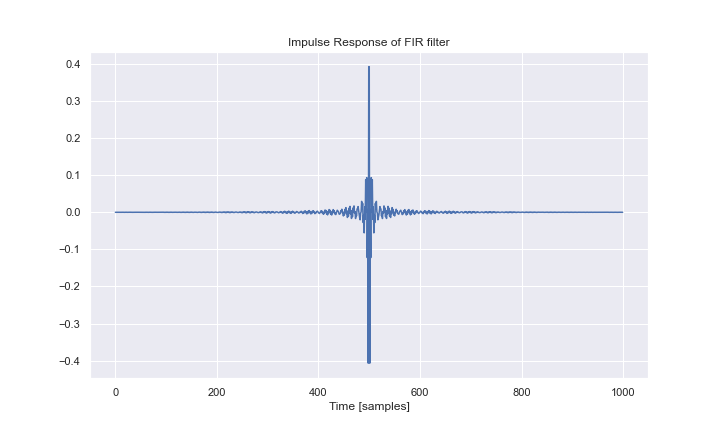

Text(0.5, 0, 'Time [samples]')

In [119]:
L_I = 1000 # impulse response (number of samples)

# create filter
testfilt = sps.firwin(L_I, [1000, 3900], nyq=fs/2, pass_zero=False) #num_taps (filter order + 1), cutoff frequency 

plt.figure(figsize = (10,6))
plt.plot(testfilt)
plt.title('Impulse Response of FIR filter')
plt.xlabel('Time [samples]')

In [103]:
%timeit sps.lfilter(testfilt, [1, ], y)
result1 = sps.lfilter(testfilt, [1, ], y)

3.1 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
ipd.Audio(data=result1, rate = fs)

# Overlap add filter setup

In [104]:
#$L_I$ is the length of the impulse response, $L_F$ is the lenth of the FFT, $L_S = L_F - L_I + 1$ is the length of the signal that can be filtered in one ieration

L_F = 2<<(L_I-1).bit_length() #shifts left by bit length of impulse length - 1
L_S = L_F - L_I + 1 #length of the signal that can be filtered in one iteration
FDir = np.fft.rfft(testfilt, n=L_F) #convert filter to frequency domain with fft for real output

testsig = y

L_sig = testsig.shape[0] 
offsets = range(0, L_sig, L_S)

print('FFT size {}, filter segment size {}, overall signal length {}.'.format(L_F, L_S, L_sig))

FFT size 2048, filter segment size 1049, overall signal length 28882.


In [105]:
L_F = 2<<(L_I-1).bit_length() #shifts left by bit length of impulse length - 1
L_S = L_F - L_I + 1 #length of the signal that can be filtered in one iteration
FDir = np.fft.rfft(testfilt, n=L_F) #convert filter to frequency domain with fft for real output

testsig = y

L_sig = testsig.shape[0] 
offsets = range(0, L_sig, L_S)

print('FFT size {}, filter segment size {}, overall signal length {}.'.format(L_F, L_S, L_sig))

tempresult = [np.fft.irfft(np.fft.rfft(testsig[n:n+L_S], n=L_F)*FDir) for n in offsets]
result2 = np.zeros(L_sig+L_F)
for i, n in enumerate(offsets):
    result2[n:n+L_F] += tempresult[i]
    #print(len(result2[n:n+L_F]), len(tempresult[i]))

result2 = result2[:L_sig]


FFT size 2048, filter segment size 1049, overall signal length 28882.


In [106]:
plt.plot(result1-result2)
print('SNR is {}.'.format(10*np.log10(np.sum(result1**2)/np.sum((result1-result2)**2))))

SNR is 299.2374524946498.


In [88]:
len(result2[n:n+L_F])

559

937 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<IPython.core.display.Javascript object>


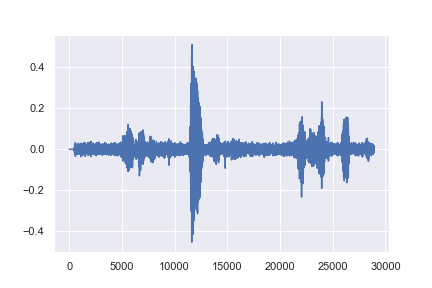

In [123]:
def overlap_add_filtering(signal, filt, L_I):
    """
    doc string required
    """
    bits_to_shift_by = (L_I-1).bit_length() # number of bits necessary to represent in binary
    L_F = 2<<bits_to_shift_by # length of fourier transform window
    L_W = L_F - L_I + 1 # length of signal to be filtered in single window overlap iteration
    
    filt_F = np.fft.rfft(filt, n=L_F) # filter in frequency domain
    
    windows = [w for w in range(0, len(signal), L_W)]
    
    windows_f = []
    for w in windows:
        signal_w = signal[w:w+L_W] # windowed signal
        signal_w_F = np.fft.rfft(signal_w, n=L_F) #windowed signal in frequency domain
        windows_f.append(np.fft.irfft(signal_w_F*filt_F)) #filtered windowed signal in time domain 
    
    signal_f = np.zeros(len(signal) + L_F)
    for i,n in enumerate(windows):
        signal_f[n:n+L_F] += windows_f[i]
        
    return signal_f[:L_sig] #truncate to length of original signal

%timeit overlap_add_filtering(y, testfilt, L_I)
plt.figure()
plt.plot(overlap_add_filtering(y, testfilt, L_I))

In [ ]:
#compare computational efficiency of the two methods and their performance (SNR)

 # real time spectrogram

In [170]:
try:
    import sounddevice as sd  # https://python-sounddevice.readthedocs.io
except ModuleNotFoundError:
    !pip3 install sounddevice
    import sounddevice as sd

In [173]:
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 


<IPython.core.display.Javascript object>


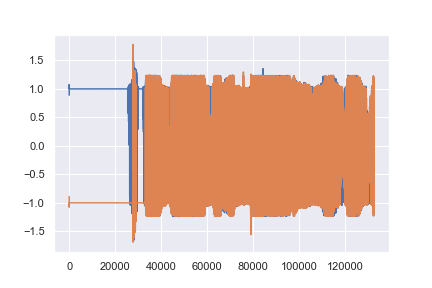

array([[ 0.8904686, -0.8904687],
       [ 1.0759884, -1.0759885],
       [ 0.9425319, -0.942532 ],
       ...,
       [ 0.9999444,  0.9937657],
       [ 1.0032902,  1.0111272],
       [ 0.9967375,  0.9896525]], dtype=float32)

In [175]:

plt.figure()
plt.plot(myrecording)
myrecording

In [178]:
ipd.Audio(myrecording.T, rate = fs)

In [ ]:
def get_Hz_scale_vec(ks,sample_rate,Npoints):
    freq_Hz = ks*sample_rate/Npoints
    freq_Hz  = [int(i) for i in freq_Hz ] 
    return(freq_Hz )

ks   = np.linspace(0,len(mag),Nxlim)
ksHz = get_Hz_scale_vec(ks,sample_rate,len(ts))


def get_xn(Xs,n):
    '''
    calculate the Fourier coefficient X_n of 
    Discrete Fourier Transform (DFT)
    '''
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

def get_xns(ts):
    '''
    Compute Fourier coefficients only up to the Nyquest Limit Xn, n=1,...,L/2
    and multiply the absolute value of the Fourier coefficients by 2, 
    to account for the symetry of the Fourier coefficients above the Nyquest Limit. 
    '''
    mag = []
    L = len(ts)
    for n in range(int(L/2)): # Nyquest Limit
        mag.append(np.abs(get_xn(ts,n))*2)
    return(mag)
mag = get_xns(ts)


def create_spectrogram(ts,NFFT,noverlap = None):
    '''
          ts: original time series
        NFFT: The number of data points used in each block for the DFT.
          Fs: the number of points sampled per second, so called sample_rate
    noverlap: The number of points of overlap between blocks. The default value is 128. 
    '''
    if noverlap is None:
        noverlap = NFFT/2
    noverlap = int(noverlap)
    starts  = np.arange(0,len(ts),NFFT-noverlap,dtype=int)
    # remove any window with less than NFFT sample size
    starts  = starts[starts + NFFT < len(ts)]
    xns = []
    for start in starts:
        # short term discrete fourier transform
        ts_window = get_xns(ts[start:start + NFFT]) 
        xns.append(ts_window)
    specX = np.array(xns).T
    # rescale the absolute value of the spectrogram as rescaling is standard
    spec = 10*np.log10(specX)
    assert spec.shape[1] == len(starts) 
    return(starts,spec)

L = 256
noverlap = 84
starts, spec = create_spectrogram(ts,L,noverlap = noverlap 

def plot_spectrogram(spec,ks,sample_rate, L, starts, mappable = None):
    plt.figure(figsize=(20,8))
    plt_spec = plt.imshow(spec,origin='lower')

    ## create ylim
    Nyticks = 10
    ks      = np.linspace(0,spec.shape[0],Nyticks)
    ksHz    = get_Hz_scale_vec(ks,sample_rate,len(ts))
    plt.yticks(ks,ksHz)
    plt.ylabel("Frequency (Hz)")

    ## create xlim
    Nxticks = 10
    ts_spec = np.linspace(0,spec.shape[1],Nxticks)
    ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,total_ts_sec*starts[-1]/len(ts),Nxticks)]
    plt.xticks(ts_spec,ts_spec_sec)
    plt.xlabel("Time (sec)")

    plt.title("Spectrogram L={} Spectrogram.shape={}".format(L,spec.shape))
    plt.colorbar(mappable,use_gridspec=True)
    plt.show()
    return(plt_spec)
plot_spectrogram(spec,ks,sample_rate,L, starts)

## Adding Reverberation by convolving with Room Impulse Responses (RIRs)

Room Impulse Responses (RIRs) charaterise rooms acoustically. They can be generated from the room geometry using the [Room Impulse Response Generator](https://www.audiolabs-erlangen.de/fau/professor/habets/software/rir-generator) which has to be installed using the `!pip install rir_generator` once and can then be imported. 

<br>
<a id='task_1'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1:**
    
<ul>
<li> 
    Load two WAVE files containing speech and noise, e.g. <code>speech_8kHz_murder.wav</code> and <code>noise_8kHz.wav</code> from the Internet address <code>https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/</code> and load them into two variables <code>s</code> and <code>n</code>.
</li> 
<li> 
    a
</li> 
</ul>
</div>

In [7]:
# uncomment the following line if you need to install
!pip install rir_generator 
import rir_generator as rir

  Using cached rir-generator-0.1.0.tar.gz (8.6 kB)
  Running setup.py clean for rir-generator
Failed to build rir-generator
    Running setup.py install for rir-generator: started
    Running setup.py install for rir-generator: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\stefan\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\stefan\\AppData\\Local\\Temp\\pip-install-kiltfjr2\\rir-generator_21a94f20808649d994566fc036ad6246\\setup.py'"'"'; __file__='"'"'C:\\Users\\stefan\\AppData\\Local\\Temp\\pip-install-kiltfjr2\\rir-generator_21a94f20808649d994566fc036ad6246\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\stefan\AppData\Local\Temp\pip-wheel-vcxb2qv5'
       cwd: C:\Users\stefan\AppData\Local\Temp\pip-install-kiltfjr2\rir-generator_21a94f20808649d994566fc036ad6246\
  Complete output (25 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\

ModuleNotFoundError: No module named 'rir_generator'

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 